<Figure size 2880x1440 with 0 Axes>

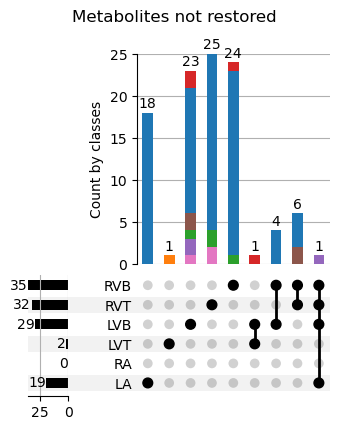

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from matplotlib.pyplot import gcf
from upsetplot import UpSet
from matplotlib import cm

# import superclass information from molnetenhancer data.
# features in rows.
data_b = pandas.read_csv("treatment-data-annotation.csv")
data_b = data_b.set_index(['filename'])
mass_class_series = data_b.pop("classes")

data_LA = pandas.read_csv("union-9-15-LA-fix.csv")
data_LA = data_LA.set_index(['filename'])

data_RA = pandas.read_csv("union-9-15-RA-fix.csv")
data_RA = data_RA.set_index(['filename'])

data_LVT = pandas.read_csv("union-9-15-LVT-fix.csv")
data_LVT = data_LVT.set_index(['filename'])

data_LVB = pandas.read_csv("union-9-15-LVB-fix.csv")
data_LVB = data_LVB.set_index(['filename'])

data_RVT = pandas.read_csv("union-9-15-RVT-fix.csv")
data_RVT = data_RVT.set_index(['filename'])

data_RVB = pandas.read_csv("union-9-15-RVB-fix.csv")
data_RVB = data_RVB.set_index(['filename'])

# upset plot seems can not use string, only can use number, so transfer letter to number
trans_number = {'group9_group15':1, 'group9':1, 'group15':1,'not_restored':1}

recover_series_LA = data_LA.pop("LA")
recover_series_LA = recover_series_LA.drop(recover_series_LA[(recover_series_LA.values != 'not_restored')].index)
col_colors_LA = recover_series_LA.map(trans_number)

recover_series_RA = data_RA.pop("RA")
recover_series_RA = recover_series_RA.drop(recover_series_RA[(recover_series_RA.values != 'not_restored')].index)
col_colors_RA = recover_series_RA.map(trans_number)

recover_series_LVT = data_LVT.pop("LVT")
recover_series_LVT = recover_series_LVT.drop(recover_series_LVT[(recover_series_LVT.values != 'not_restored')].index)
col_colors_LVT = recover_series_LVT.map(trans_number)

recover_series_LVB = data_LVB.pop("LVB")
recover_series_LVB = recover_series_LVB.drop(recover_series_LVB[(recover_series_LVB.values != 'not_restored')].index)
col_colors_LVB = recover_series_LVB.map(trans_number)

recover_series_RVT = data_RVT.pop("RVT")
recover_series_RVT = recover_series_RVT.drop(recover_series_RVT[(recover_series_RVT.values != 'not_restored')].index)
col_colors_RVT = recover_series_RVT.map(trans_number)

recover_series_RVB = data_RVB.pop("RVB")
recover_series_RVB = recover_series_RVB.drop(recover_series_RVB[(recover_series_RVB.values != 'not_restored')].index)
col_colors_RVB = recover_series_RVB.map(trans_number)

col_colors = pandas.DataFrame(col_colors_LA).join(pandas.DataFrame(col_colors_RA),how='outer').join(pandas.DataFrame(col_colors_LVT),how='outer').join(pandas.DataFrame(col_colors_LVB),how='outer').join(pandas.DataFrame(col_colors_RVT),how='outer').join(pandas.DataFrame(col_colors_RVB),how='outer').join(pandas.DataFrame(mass_class_series), how = 'inner')

col_colors = col_colors.set_index(col_colors.LA == 1).set_index(col_colors.RA == 1, append=True).set_index(col_colors.LVT == 1, append=True).set_index(col_colors.LVB == 1, append=True).set_index(col_colors.RVT == 1, append=True).set_index(col_colors.RVB == 1, append=True)

metabolites_color = {'No matches':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
           'Benzenoids':(1.0, 0.4980392156862745, 0.054901960784313725), 
           'Organic acids and derivatives':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
           'Lipids and lipid-like molecules':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 
           'Organoheterocyclic compounds':(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
           'Nucleosides, nucleotides, and analogues':(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
           'Phenylpropanoids and polyketides':(0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 
           'Organic nitrogen compounds':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
           'Organic oxygen compounds':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}


# plot the upset plot
upset = UpSet(col_colors,show_counts = True, intersection_plot_elements=0, sort_categories_by = None, element_size=20)  # disable the default bar chart
upset.add_stacked_bars(by='classes', colors=metabolites_color, title="Count by classes", elements=10)
plt.figure(figsize = (40, 20))
plt.style.use('default')
upset.plot()
plt.legend('',frameon=False)
plt.suptitle("Metabolites not restored")
plt.savefig("upset-plot-not-restored.pdf", dpi = 300, bbox_inches = 'tight')
plt.savefig("upset-plot-not-restored.png", dpi = 300, bbox_inches = 'tight')
